#  Data Cleaning



After looking into my dataset and reviewing what categorical and numerical data I will require for my analysis, I will start by cleaning the dataset by:
  1. Dropping columns that are unnecessary for my analysis
  2. Checking for missing values
  3. Rectifying column arrangement for uniformity
  4. Checking for outliers and eliminating them
  5. Checking and dropping duplicates
  6. Changing data types for uniformity

I will start by importing the necessary libraries for data cleaning. They are pre-written codes that provide a specific functionality in our case data cleaning and analysis.

In [1]:
# Importing the various libraries used for data cleaning and analysis
# We assign each library an alias for instance the alias for pandas is pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


After importing the various libraries I will load the dataset to my notebook.

In [34]:
#Loading the dataset
#Assign the notebook a variable df:
df = pd.read_csv("AviationData.csv", encoding='latin1')
#To confirm the dataset has been uploaded in the notebook we either use df(it will upload the first and last five rows)
df
#Similarly we can select the first five rows only by using df.head() and the last five rows only by running df.tail()


C:\Users\123\AppData\Local\Temp\ipykernel_10768\692569652.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


When loading the dataset in my code you notice encoding='latin1'in some cases the code will still run without including latin1 but in my case I had to include it to ensure python correctly interpretes the file content.

Before cleaning we will create a copy to retain the contents of the origin for further analysis if need be


In [3]:
#I will run the code below to create a copy by assigning the variable df1
df1=df.copy(deep=True)
#To confirm the copy has been upload run df1
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Dropping the columns

Here I will drop some the columns that are not necessary for my analysis, to easen the analysis process

In [4]:
#I will use the code df1.drop to drop the columns
df1.drop(["Event.Id","Accident.Number","Airport.Code"],axis=1,inplace=True)
#We use axis=1 when dealing with columns
#Inplace modifies the objects without creating a new copy

In [5]:
#To confirm the columns have been removed I use df1.columns
df1.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Changing column format :

For uniformity I will change the format to title

In [6]:
#I will use the code below to change the column format to title we assign df1.columns as a variable and use the .title() 
df1.columns=df1.columns.str.title()
#I will run the code df1.columns to confirm the change
df1.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.Of.Engines', 'Engine.Type', 'Far.Description',
       'Schedule', 'Purpose.Of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.Of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In our dataset we notice the punctuation is incorrect we will replace the fullstops(.) with whitespaces(" ")

In [7]:
#To replace the fullstops(.) with whitespaces(" ") we run the code below
df1.columns=df1.columns.str.replace("."," ")
#Use df1.columns to confirm changes
df1.columns

Index(['Investigation Type', 'Event Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

## Checking for missing values:

We need to check for any missing values and rectify them to avoid problems during analysis. We do this by running the codes below:

In [8]:
#Checking for missing values for the entire dataset we use the .isnull().sum().any()
df1.isnull().sum().any()
#If the result is true it indicates that there are missing values from the data set
#However if it indicates false it means the dataset lacks missing values

True

For our case the dataset has missing values and hence we can check the number of missing values in each column by running the code below

In [9]:
#checking for missing vaues for each columns we use .isna().sum()
df1.isna().sum()

Investigation Type            0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: int64

In our case we have a lot of missing values. We can rectify the missing values for numerical values filling in statistical measures such mean, mode or median

We start by checking the skewness of the numerical information by plotting a histogram or kdeplot

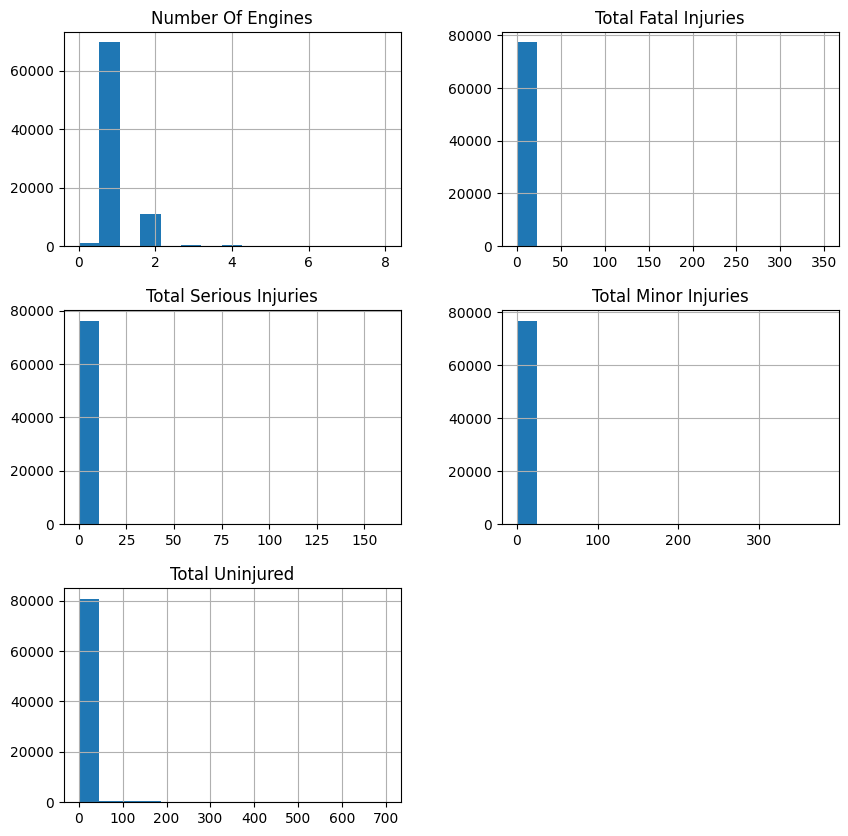

In [10]:
#plotting the histogram 
df1.hist(bins=15,figsize=(10,10));

Since the plots show the distribution is positively skewed(right skewed) mode will be the most appropriate method to use, as it indicates the most frequent value.

In [11]:
#To input the missing values for all numeric data we will use for loop for easier manipulation:
for column in df1.select_dtypes(include=["number"]).columns:
        df1[column].fillna(df1[column].mode()[0],inplace=True)

In [12]:
#To confirm that all numeric values lack missing data we will run
df1.isna().sum()

Investigation Type            0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines             0
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries          0
Total Serious Injuries        0
Total Minor Injuries          0
Total Uninjured               0
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: int64

Confirmed that all numeric missing values have been cartered for. Hence will proceed by filling object category by inputing the word ("unknown")

In [13]:
#We also run the code using for loop
for column in df1.select_dtypes(include=["object"]).columns:
    df1[column].fillna("unknown",inplace=True)

In [14]:
#for confirmation that all missing values have been erased for the entire dataset
df1.isnull().sum().any()

False

The result will confirm that all the missing values have been rectified

## Checking for duplicates

We can check for the duplicated values by running the code below:

In [23]:
#We will use .duplicated().sum()
df1.duplicated().sum()

0

The result is (0) meaning the dataset is free of any duplicated value.

## Checking for outliers

To check for outliers will start by plotting a boxplot

<Axes: >

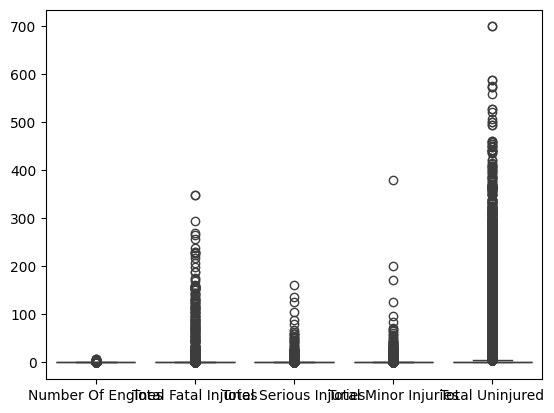

In [18]:
#we will use the seaborn library to plot
sns.boxplot(df1)

It is evident that the numeric values have a few outliers we will Inter-quantile Range(IQR) to remove the outliers

In [19]:
# Select only numeric columns from the dataframe
numeric_columns = df1.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = df1[numeric_columns].quantile(0.25)
Q3 = df1[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data by keeping only values within the IQR bounds
df_no_outliers = df1[(df1[numeric_columns] >= lower_bound) & (df1[numeric_columns] <= upper_bound)]

df_no_outliers = df_no_outliers.dropna()


In [31]:
df1

,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,unknown,Fatal(2),Destroyed,unknown,...,Personal,unknown,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,unknown
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,unknown,Fatal(4),Destroyed,unknown,...,Personal,unknown,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,unknown,Fatal(3),Destroyed,unknown,...,Personal,unknown,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,"EUREKA, CA",United States,unknown,unknown,unknown,Fatal(2),Destroyed,unknown,...,Personal,unknown,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,"Canton, OH",United States,unknown,unknown,unknown,Fatal(1),Destroyed,unknown,...,Personal,unknown,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",United States,unknown,unknown,unknown,Minor,unknown,unknown,...,Personal,unknown,0.0,1.0,0.0,0.0,unknown,unknown,unknown,29-12-2022
88885,Accident,2022-12-26,"Hampton, NH",United States,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,0.0,0.0,0.0,0.0,unknown,unknown,unknown,unknown
88886,Accident,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAYSON,Non-Fatal,Substantial,Airplane,...,Personal,unknown,0.0,0.0,0.0,1.0,VMC,unknown,unknown,27-12-2022
88887,Accident,2022-12-26,"Morgan, UT",United States,unknown,unknown,unknown,unknown,unknown,unknown,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,unknown,unknown,unknown,unknown
